# DAY1 (19.5.25)

# What is Natural Language Processing (NLP)?

Natural Language Processing (NLP) is a subfield of Artificial Intelligence (AI) and Computational Linguistics that enables machines to process, analyze, and generate human (natural) language. It involves a combination of linguistics, machine learning, and statistical methods to interpret text or speech data in a meaningful way.

NLP tasks typically involve transforming raw, unstructured language data into structured representations suitable for downstream machine learning tasks. This often includes converting text into numeric feature vectors, identifying linguistic structures (syntax, semantics), and applying probabilistic models.

##  Core Applications and Use Cases

1. Text Classification
Assigning predefined categories to text documents (e.g., spam detection, sentiment analysis, topic classification) using supervised models like Naive Bayes, SVMs, or deep learning models.

2. Tokenization & POS Tagging
Breaking text into meaningful units (tokens) and tagging each word with its part of speech using models like Hidden Markov Models (HMMs) or neural   networks.

3. Named Entity Recognition (NER)
Identifying and classifying named entities (like persons, organizations, locations) using sequence models such as CRFs, BiLSTM-CRF, or Transformers (e.g., BERT-based NER).

4. Language Modeling & Text Generation
Modeling the probability distribution of word sequences for applications like autocomplete, speech synthesis, and machine translation. Common approaches include n-grams, RNNs, LSTMs, and Transformers.

5. Machine Translation
Translating text from one language to another using seq2seq models with attention mechanisms or Transformer-based architectures (e.g., Google’s T5, OpenNMT).

6. Information Retrieval & Question Answering
Retrieving relevant information or direct answers from large corpora using techniques like TF-IDF, BM25, or dense retrieval models like DPR and BERT-based QA systems.

In [1]:
import nltk
import spacy

print("NLTK and spaCy imported successfully!")


NLTK and spaCy imported successfully!


# Some NLP Concepts

## WordNet
WordNet is a large lexical database of English.
Words are grouped into synsets (sets of cognitive synonyms).
It helps capture semantic relationships such as:
Synonyms (words with similar meanings)
Hypernyms (general terms)
Hyponyms (specific terms)
Antonyms
Used in lemmatization and meaning-based NLP tasks.

## One-Hot Encoding
Represents each word in the vocabulary as a binary vector.
All values are 0 except for a single 1 at the index corresponding to that word.
Example (vocab = [“apple”, “banana”, “car”]):
"banana" → [0, 1, 0]
Limitations:
High-dimensional (for large vocabularies)
No information about similarity or meaning (all vectors are orthogonal)

## Word Vectors
Word vectors (a.k.a. word embeddings) represent words as dense, continuous-valued vectors.
Unlike one-hot vectors, word vectors capture semantic similarity.
Words with similar meaning lie closer in the vector space.
Example:
vector("king") - vector("man") + vector("woman") ≈ vector("queen")

## Word2Vec
A popular algorithm to learn word embeddings using shallow neural networks.
Two main architectures:
CBOW (Continuous Bag of Words) – Predicts the target word from surrounding context.
Skip-Gram – Predicts context words given the target word.
Learns from co-occurrence patterns in large corpora.
Produces meaningful vector relationships (semantic arithmetic).

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to C:\Users\Asus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Asus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Asus/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from nltk.corpus import wordnet as wn

# Get synsets for a word
synsets = wn.synsets("good")
print("Synsets of 'good':", synsets)

# Explore definitions and examples
for syn in synsets[:3]:
    print(f"Definition: {syn.definition()}")
    print(f"Examples: {syn.examples()}")


Synsets of 'good': [Synset('good.n.01'), Synset('good.n.02'), Synset('good.n.03'), Synset('commodity.n.01'), Synset('good.a.01'), Synset('full.s.06'), Synset('good.a.03'), Synset('estimable.s.02'), Synset('beneficial.s.01'), Synset('good.s.06'), Synset('good.s.07'), Synset('adept.s.01'), Synset('good.s.09'), Synset('dear.s.02'), Synset('dependable.s.04'), Synset('good.s.12'), Synset('good.s.13'), Synset('effective.s.04'), Synset('good.s.15'), Synset('good.s.16'), Synset('good.s.17'), Synset('good.s.18'), Synset('good.s.19'), Synset('good.s.20'), Synset('good.s.21'), Synset('well.r.01'), Synset('thoroughly.r.02')]
Definition: benefit
Examples: ['for your own good', "what's the good of worrying?"]
Definition: moral excellence or admirableness
Examples: ['there is much good to be found in people']
Definition: that which is pleasing or valuable or useful
Examples: ['weigh the good against the bad', 'among the highest goods of all are happiness and self-realization']


# DAY 2

##  Lecture 2 Summary – CS224N: NLP with Deep Learning

###  1. Optimization Basics
- Introduction to gradient descent for minimizing loss functions in NLP.
- Importance of objective functions in training embeddings like word2vec.

###  2. Word2Vec Review
- Two architectures: **CBOW (Continuous Bag of Words)** and **Skip-gram**.
- Trains word embeddings based on local context in a window.
- Optimization through **negative sampling** or **hierarchical softmax**.

###  3. Word Vectors
- Dense vector representations of words capturing semantic similarity.
- Words like `["king", "queen", "man", "woman"]` form analogies using vector arithmetic.

###  4. Capturing Word Meaning via Counting
- Co-occurrence matrix from large corpora (e.g., how often words appear together).
- **PMI (Pointwise Mutual Information)** and **SVD (Singular Value Decomposition)** used for dimensionality reduction.
- Count-based models vs prediction-based models (like word2vec).

###  5. Evaluating Word Embeddings
- Intrinsic tasks: similarity (e.g., cosine similarity), analogy tasks.
- Extrinsic tasks: downstream NLP tasks like NER or POS tagging.

###  6. Word Senses
- Polysemy issue: words have multiple meanings.
- Embeddings trained on full corpora struggle with disambiguation.

###  7. Neural Network Classifiers
- Neural networks for NLP: feedforward and shallow architectures.
- Layers: input → hidden → output (softmax).

---

 **Key Goal:** Understand how word embeddings are generated and evaluated, and how neural networks begin to classify based on learned features.


#  NLP Pipeline: From Text to Features

The **Natural Language Processing (NLP) pipeline** is a sequence of steps that transforms raw text into features that can be fed into machine learning or deep learning models.

###  Common NLP Pipeline Steps:
1. **Raw Text**: Input text from articles, social media, etc.
2. **Tokenization**: Split the text into words, punctuation, or subwords.
3. **Text Cleaning**: Lowercasing, removing stopwords, stemming, lemmatization.
4. **Feature Extraction**: Convert text to numbers using:
   - Bag-of-Words
   - TF-IDF
   - Word Embeddings (Word2Vec, GloVe, etc.)
5. **Modeling**: Use features as input for classification, translation, etc.

 Example:


In [4]:
# Load sample text
text = "Natural Language Processing (NLP) enables machines to understand human language."

# Print the original text
print("Original Text:")
print(text)

# Split into words
tokens = text.split()
print("\nTokens:")
print(tokens)


Original Text:
Natural Language Processing (NLP) enables machines to understand human language.

Tokens:
['Natural', 'Language', 'Processing', '(NLP)', 'enables', 'machines', 'to', 'understand', 'human', 'language.']


In [5]:
import nltk
nltk.download('wordnet')      # Lemmatizer
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('brown')        # Sample corpus


[nltk_data] Downloading package wordnet to C:\Users\Asus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to C:\Users\Asus/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [6]:
from nltk.corpus import brown

# Get first few sentences from the Brown corpus
sentences = brown.sents()[:5]
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}: {sentence}")


Sentence 1: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
Sentence 2: ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
Sentence 3: ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
Sentence 4: ['``', 'Only', 'a

# DAY 3

#  CS224N Lecture Summary: Neural Network Foundations in NLP

##  Objective
To understand the **mathematical foundations** of how neural networks learn in the context of NLP tasks, with a focus on:
- Gradient computation
- Backpropagation
- Named Entity Recognition (NER)
- Matrix calculus
- Automatic differentiation in modern frameworks like PyTorch

##  Key Concepts Covered

###  1. **Gradient Computation**
- Gradients are crucial for training neural networks.
- They indicate the direction and rate at which model parameters should change to minimize the loss function.
- The process of computing these gradients relies on calculus and linear algebra.

###  2. **Backpropagation Algorithm**
- A core algorithm that efficiently computes gradients using the chain rule of calculus.
- It involves:
  - **Forward pass:** computing predictions using current model weights.
  - **Backward pass:** calculating the gradient of the loss with respect to each parameter.

>  Backpropagation allows each layer to reuse gradients, making training scalable even in deep networks.

###  3. **Named Entity Recognition (NER)**
- Used as a real-world example to apply neural network principles.
- Highlights the importance of **context** in classifying entities like:
  - People’s names
  - Locations
  - Organizations
- A simple model: concatenate word vectors from a window of words → pass through a neural network → classify.

###  4. **Matrix Calculus & Vectorization**
- Working with **vectors and matrices** is more efficient than scalar-by-scalar computations.
- Neural networks rely heavily on **vectorized gradient computation** using matrix calculus.

>  Enables faster computation and easier optimization in frameworks like PyTorch and TensorFlow.

###  5. **Automatic Differentiation**
- A powerful tool offered by modern libraries (e.g., PyTorch, TensorFlow).
- Automatically constructs the **computation graph** and calculates derivatives.
- Saves time and reduces the likelihood of errors in gradient implementation.



In [7]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 12.7 MB/s eta 0:00:01
     --- ------------------------------------ 1.0/12.8 MB 12.7 MB/s eta 0:00:01
     --- ------------------------------------ 1.0/12.8 MB 12.7 MB/s eta 0:00:01
     ---- ----------------------------------- 1.6/12.8 MB 1.8 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 1.8 MB/s eta 0:00:07
     ----- ---------------------------------- 1.8/12.8 MB 1.5 MB/s eta 0:00:08
     ------- -------------------------------- 2.4/12.8 MB 1.7 MB/s eta 0:00:07
     -------- ------------------------------- 2.6/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 2.9/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 2.9/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 3.1/12.8 MB 1.3 MB/s eta 0:00:08
     ---------- ----------------------------- 3.4/12.8 M


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")


In [9]:
sample_text = "Apple is looking at buying U.K. startup for $1 billion. This news was published yesterday."


In [10]:
nltk_sentences = sent_tokenize(sample_text)
print("NLTK Sentence Tokenization:")
print(nltk_sentences)


NLTK Sentence Tokenization:
['Apple is looking at buying U.K. startup for $1 billion.', 'This news was published yesterday.']


In [11]:
nltk_words = word_tokenize(sample_text)
print("NLTK Word Tokenization:")
print(nltk_words)


NLTK Word Tokenization:
['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion', '.', 'This', 'news', 'was', 'published', 'yesterday', '.']


In [12]:
doc = nlp(sample_text)

# Sentence tokenization
print("spaCy Sentence Tokenization:")
for sent in doc.sents:
    print(sent)

# Word tokenization
print("\nspaCy Word Tokenization:")
for token in doc:
    print(token.text)


spaCy Sentence Tokenization:
Apple is looking at buying U.K. startup for $1 billion.
This news was published yesterday.

spaCy Word Tokenization:
Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion
.
This
news
was
published
yesterday
.


In [13]:
def nltk_tokenizer(text):
    return word_tokenize(text)

def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Test on a custom input
test_text = "Elon Musk founded SpaceX in 2002."
print("NLTK Tokens:", nltk_tokenizer(test_text))
print("spaCy Tokens:", spacy_tokenizer(test_text))


NLTK Tokens: ['Elon', 'Musk', 'founded', 'SpaceX', 'in', '2002', '.']
spaCy Tokens: ['Elon', 'Musk', 'founded', 'SpaceX', 'in', '2002', '.']


###  Comparison: NLTK vs spaCy Tokenization

| Feature                  | NLTK                         | spaCy                        |
|--------------------------|------------------------------|------------------------------|
| Sentence Tokenizer       | Uses pre-trained Punkt model | Built-in, context-aware      |
| Word Tokenizer           | Rule-based                   | Rule-based + linguistic info |
| Named Entity Detection   | Not built-in                 | Built-in                   |
| Speed                    | Fast                         | Faster + efficient           |

>  **spaCy** offers richer linguistic features and better integration with NLP pipelines, while **NLTK** is great for learning and experimentation.


#  Day 4 – May 22: Dependency Parsing

##  Topic Overview

Today’s lecture focused on **Dependency Parsing**, a core technique in natural language processing (NLP) that helps analyze the grammatical structure of a sentence. It identifies relationships between words (called **dependencies**) and forms a syntactic structure that machines can understand. Unlike constituency parsing which focuses on phrases, dependency parsing is **word-to-word relational**.

##  Key Learnings

###  What is Dependency Parsing?

- In **dependency grammar**, a sentence is structured around binary relationships between words.
- Each relationship is a directed link from a **head** to a **dependent**.

####  Example:
Sentence: `"The quick brown fox jumps over the lazy dog."`

Dependency Relations:
- "jumps" → head of the sentence (root verb)
- "fox" → subject of "jumps"
- "quick", "brown" → modifiers of "fox"
- "over" → preposition linked to "jumps"
- "dog" → object of "over"
- "lazy" → modifier of "dog"

###  Syntax and Sentence Structure

- Words have **parts of speech (POS)** (e.g., noun, verb, adjective), and their arrangement determines sentence meaning.
- Syntactic structure helps in tasks like translation, question answering, and sentiment analysis.

####  Example:
- `"Alice gave Bob a book."`
  - Subject: Alice
  - Verb: gave
  - Indirect Object: Bob
  - Direct Object: book

The relationships here form a tree with "gave" as the root.

###  Universal Dependencies (UD)

- UD is a cross-lingual framework for syntactic annotation.
- It standardizes dependency labels like:
  - `nsubj` (nominal subject)
  - `obj` (object)
  - `amod` (adjectival modifier)
  - `root` (main predicate)

####  Example:
For `"She reads a book."`, the UD structure would look like:
- reads → root
- She → nsubj
- book → obj
- a → det

###  Ambiguity in Parsing

Language is inherently ambiguous. The same sentence can be parsed in multiple ways based on context.

####  Example:
Headline: `"Kids make nutritious snacks"`
- Parse 1: Kids are preparing healthy snacks.
- Parse 2: Kids are the snacks.

This kind of ambiguity makes dependency parsing both challenging and critical.

###  Transition-Based Parsing

- A **transition-based parser** builds a dependency tree incrementally using operations:
  - `SHIFT`: Move word from buffer to stack.
  - `LEFT-ARC`/`RIGHT-ARC`: Create a dependency relation.
  - `REDUCE`: Remove a word from the stack.

This is modeled as a state machine with actions predicted by a trained classifier.

###  Evaluating Parsers

- **Treebanks** are annotated datasets used to train and evaluate dependency parsers.
- Common metrics:
  - **UAS** (Unlabeled Attachment Score): % of correct head assignments.
  - **LAS** (Labeled Attachment Score): % of correct head + label assignments.


##  Summary

- Dependency parsing extracts **"who modifies whom"** in a sentence.
- Transition-based methods offer an efficient way to perform parsing.
- The structural outputs are essential for downstream NLP applications.
- Modern models use machine learning to automate parsing decisions based on large treebank datasets.



In [14]:
import re
import string
from nltk.tokenize import word_tokenize
import nltk



In [15]:
sample_text = "Hello there! This is Day 4 of NLP. We're learning preprocessing – lowercasing, punctuation removal, and tokenization."


In [16]:
lower_text = sample_text.lower()
print("Lowercased Text:\n", lower_text)


Lowercased Text:
 hello there! this is day 4 of nlp. we're learning preprocessing – lowercasing, punctuation removal, and tokenization.


In [17]:
# Create a regex pattern for punctuation
pattern = f"[{re.escape(string.punctuation)}]"
no_punct_text = re.sub(pattern, "", lower_text)
print("Text without Punctuation:\n", no_punct_text)


Text without Punctuation:
 hello there this is day 4 of nlp were learning preprocessing – lowercasing punctuation removal and tokenization


In [18]:
tokens = word_tokenize(no_punct_text)
print("Tokenized Text:\n", tokens)


Tokenized Text:
 ['hello', 'there', 'this', 'is', 'day', '4', 'of', 'nlp', 'were', 'learning', 'preprocessing', '–', 'lowercasing', 'punctuation', 'removal', 'and', 'tokenization']


In [19]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = word_tokenize(text)
    return tokens

# Try it on the sample
processed = preprocess_text(sample_text)
print("Preprocessed Output:\n", processed)


Preprocessed Output:
 ['hello', 'there', 'this', 'is', 'day', '4', 'of', 'nlp', 'were', 'learning', 'preprocessing', '–', 'lowercasing', 'punctuation', 'removal', 'and', 'tokenization']


#  Day 4 – Text Preprocessing

This notebook demonstrates basic preprocessing steps commonly used in NLP:

###  Steps Covered:
- **Lowercasing** – Standardizes all words to lowercase.
- **Punctuation Removal** – Removes all punctuation using `string.punctuation` and regex.
- **Tokenization** – Splits the cleaned text into tokens (words).
- **Preprocessing Function** – A clean function to perform all steps on any input text.

These steps help reduce noise and standardize input data before feeding it into NLP models.


# DAY 5

# Neural Dependency Parsing and RNNs 

## Summary

This lecture covers the transition from traditional symbolic parsing methods to neural dependency parsing, discussing how dense, learned representations enhance both performance and speed. It also introduces the basics of neural networks, language modeling, and Recurrent Neural Networks (RNNs), laying the foundation for handling sequential data in NLP.



## 1. Neural Dependency Parsing

Traditional parsers rely on hand-crafted, sparse features and symbolic rules, which can be inefficient and limited in generalization.

### Example:
In symbolic parsing, the model might follow a rule like:
- *If the top of the stack is a noun and the first buffer word is a verb, make a dependency link.*

However, symbolic models:
- Miss nuanced relationships
- Require manual feature engineering
- Struggle with unseen inputs

**Neural Approach:**
Neural dependency parsers learn **dense embeddings** for:
- Words
- POS tags
- Dependency labels

These are concatenated and fed into a **feedforward neural network**, which predicts the next parsing action (e.g., shift, left-arc, right-arc).

This leads to:
- Better generalization
- Vectorized (faster) computation
- No need for manual features


## 2. Advantages of Neural Approaches

- Dense embeddings represent semantic similarity (e.g., "run" and "sprint" are nearby in vector space).
- Neural classifiers allow **non-linear** decision boundaries using activations like ReLU or tanh.
- Neural models are faster and more accurate due to automatic feature learning.


## 3. Regularization and Optimization in Neural Networks

To prevent overfitting, neural networks use:

### - L2 Regularization:
Adds a penalty to large weights during training.

### - Dropout:
Randomly disables neurons during training to reduce co-adaptation.

### Example:


In [20]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Dropout(0.5),  # Dropout layer
    nn.Linear(50, 10)
)


## 4. Language Modeling

Language modeling is the task of predicting the **next word** in a sequence.

### Example:
Given input: `"I want to eat a ___"`  
The goal is to predict: `"pizza"`

Applications:
- Predictive text
- Speech recognition
- Machine translation


## 5. N-Gram Language Models

These models estimate probabilities using frequency counts of word sequences.

### Example:
Bigram probability:  
P(eat | to) = count("to eat") / count("to")

**Limitations:**
- Context is fixed to n-1 words
- Suffers from data sparsity


## 6. Neural Language Models (Window-based)

These models embed words and pass them through a neural network to predict the next word.

### Example:
Input context: `"I want to eat"`  
→ Convert to embeddings  
→ Concatenate  
→ Pass through MLP  
→ Output probabilities for next word

**Advantages:**
- Embeddings generalize across similar words
- Avoids sparsity problems in n-gram models


## 7. Recurrent Neural Networks (RNNs)

RNNs allow processing of **sequential data** by maintaining a **hidden state** over time.

### Formula:
At each time step *t*:


In [21]:
import torch
import torch.nn as nn

# A simple RNN layer
rnn = nn.RNN(input_size=10, hidden_size=20, batch_first=True)

# Input: batch_size x seq_len x input_size
x = torch.randn(5, 3, 10)
h0 = torch.zeros(1, 5, 20)  # Initial hidden state

out, hn = rnn(x, h0)
print(out.shape)  # (batch_size, seq_len, hidden_size)


torch.Size([5, 3, 20])


### Advantages:
- Learns from arbitrary-length sequences
- Shared weights across time steps
- Captures long-term dependencies (up to a point)

### Limitations:
- Sequential computation (slow training)
- Struggles with long-range dependencies (solved by LSTMs/GRUs)


#  Day 5 – Stopword Removal with NLTK (task2)

**Date:** May 23  
**Topic:** Stopword Removal  
**Goal:** Remove common words (“stopwords”) using NLTK’s built-in list, customize the list, and compare before/after.


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string



##  Example Text & Tokenization

We’ll start with a sample sentence and tokenize it into words.


In [23]:
sample_text = "This is an example sentence, demonstrating stopword removal using NLTK's default list."
tokens = word_tokenize(sample_text)
print("Original Tokens:")
print(tokens)


Original Tokens:
['This', 'is', 'an', 'example', 'sentence', ',', 'demonstrating', 'stopword', 'removal', 'using', 'NLTK', "'s", 'default', 'list', '.']


##  Default Stopword Removal

Use NLTK’s English stopword list to filter out common words, and also remove punctuation.


In [24]:
# Load default English stopwords
stop_words = set(stopwords.words('english'))

# Filter tokens
filtered_default = [
    tok for tok in tokens
    if tok.lower() not in stop_words and tok not in string.punctuation
]

print("\nAfter Default Stopword Removal:")
print(filtered_default)



After Default Stopword Removal:
['example', 'sentence', 'demonstrating', 'stopword', 'removal', 'using', 'NLTK', "'s", 'default', 'list']


##  Customizing the Stopword List

You can **add** domain-specific words or **remove** words you want to keep.  
Below, we remove "this" from the list and add "example" as a stopword.


In [25]:
# Copy and customize
custom_sw = stop_words.copy()
custom_sw.discard('this')      # Keep “this”
custom_sw.add('example')       # Remove “example”

# Apply custom list
filtered_custom = [
    tok for tok in tokens
    if tok.lower() not in custom_sw and tok not in string.punctuation
]

print("\nAfter Custom Stopword Removal:")
print(filtered_custom)



After Custom Stopword Removal:
['This', 'sentence', 'demonstrating', 'stopword', 'removal', 'using', 'NLTK', "'s", 'default', 'list']


# Day 6: Recurrent Neural Networks (RNNs) and LSTM Networks in NLP (task1)

## Introduction to RNNs and Language Models

In natural language processing (NLP), one of the fundamental tasks is language modeling — predicting the next word in a sequence.

Traditional models like n-grams are limited by context size. Recurrent Neural Networks (RNNs) are designed to address this by maintaining a *hidden state* that captures information from previous words in a sequence.

### Example:
Given the sequence:

`I am going to the`

An RNN tries to predict the next word (like "store", "park", etc.) using both the current input and hidden state from prior words.

## Structure of a Simple RNN

An RNN processes sequences one step at a time. At each time step `t`, it receives input `x_t` and previous hidden state `h_{t-1}`, then updates the hidden state and produces an output.

### Example Formula:

h_t = tanh(W_h * h_{t-1} + W_x * x_t + b)
y_t = softmax(W_y * h_t + c)

Here, `W_h`, `W_x`, and `W_y` are weight matrices, and `tanh` introduces non-linearity.


## Training RNNs

RNNs are trained using a corpus of text. The idea is to show the model a sequence of words and ask it to predict the next word at each step. The difference between the prediction and the actual word is measured using **cross-entropy loss**.

Training is typically done using **stochastic gradient descent (SGD)** and **backpropagation through time (BPTT)**.

### Example:

For the sentence "The cat sat on the mat":

- Input: "The" → Target: "cat"
- Input: "The cat" → Target: "sat"
- ...

## Challenges in RNNs: Vanishing Gradients

A major issue in simple RNNs is **vanishing gradients** — gradients become extremely small when propagated back through many time steps. This makes it difficult for RNNs to learn long-term dependencies.

### Illustration:
In a long sentence, the information at the beginning becomes "washed out" as the RNN progresses.

Example: "The movie was **not** good" — the model may forget "not" by the time it processes "good".

## LSTMs: Solving the Vanishing Gradient Problem

**Long Short-Term Memory (LSTM)** networks are a special kind of RNN designed to combat vanishing gradients.

LSTMs introduce **gates**:
- **Forget Gate**: Decides what information to discard.
- **Input Gate**: Determines what new information to store.
- **Output Gate**: Controls the output and what passes to the next hidden state.

### Example:

In the sentence:  
"I lived in France for two years so I speak French fluently."

To predict "fluently", the model needs to remember "France" — which occurred much earlier. LSTMs are capable of capturing such long-term dependencies.

## Applications of LSTMs in NLP

LSTMs have been successfully applied to:
- **Text Generation**
- **Sentiment Analysis**
- **Machine Translation**
- **Speech Recognition**

### Example in Text Generation:

Feed in: "Once upon a"

→ Model completes: "Once upon a time there was a king."

The model learns patterns in language and generates coherent text.

## LSTMs vs Simple RNNs

LSTMs outperform simple RNNs on most NLP tasks because of their ability to:
- Maintain relevant information over long distances.
- Handle long-term dependencies without forgetting.
- Converge faster during training due to better gradient flow.

## Evolution: From LSTM to Transformers

While LSTMs were dominant in the 2010s, newer models like **Transformers** (e.g., BERT, GPT) have now surpassed them in both performance and popularity.

Transformers:
- Don’t rely on recurrence.
- Can be trained in parallel.
- Are more scalable and efficient.

Still, understanding RNNs and LSTMs is crucial as they form the foundation of modern NLP architectures.

---

 **Remember:**  
- Use RNNs for sequential data.  
- Use LSTMs if you need to remember information over long time periods.  
- For cutting-edge results, explore Transformers — the future of NLP.

---


# DAY 6 (task2)

##  Stemming in NLP

**Stemming** is a text normalization technique used to reduce words to their root or base form (called a "stem"). It's a rule-based process that chops off word suffixes. 

For example:
- "running", "runner", and "ran" → "run"

### Why Use Stemming?
Stemming helps reduce vocabulary size in NLP tasks like text classification, sentiment analysis, and information retrieval, making models faster and less memory-intensive.

### Popular Stemmers in NLTK:
- **PorterStemmer**: Conservative and commonly used, developed by Martin Porter.
- **LancasterStemmer**: More aggressive, might reduce words too much (over-stemming).

In practice, stemming may result in non-words (e.g., "happiness" → "happi") but still retains the core meaning.


In [26]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer

# Initialize stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()


In [27]:
# Define a list of words to stem
words = ["running", "runner", "easily", "fairly", "happiness", "crying", "flies", "flying", "denied", "studies", "studying"]


In [28]:
# Create a table showing how each word changes after stemming
print(f"{'Original':<12} {'PorterStemmer':<15} {'LancasterStemmer'}")
print("-" * 45)

for word in words:
    porter_stemmed = porter.stem(word)
    lancaster_stemmed = lancaster.stem(word)
    print(f"{word:<12} {porter_stemmed:<15} {lancaster_stemmed}")


Original     PorterStemmer   LancasterStemmer
---------------------------------------------
running      run             run
runner       runner          run
easily       easili          easy
fairly       fairli          fair
happiness    happi           happy
crying       cri             cry
flies        fli             fli
flying       fli             fly
denied       deni            deny
studies      studi           study
studying     studi           study


In [29]:
import pandas as pd

# Create a DataFrame for visualization
df = pd.DataFrame({
    "Original": words,
    "PorterStemmer": [porter.stem(word) for word in words],
    "LancasterStemmer": [lancaster.stem(word) for word in words]
})

df


,Original,PorterStemmer,LancasterStemmer
0,running,run,run
1,runner,runner,run
2,easily,easili,easy
3,fairly,fairli,fair
4,happiness,happi,happy
5,crying,cri,cry
6,flies,fli,fli
7,flying,fli,fly
8,denied,deni,deny
9,studies,studi,study


##  Lemmatization in NLP

**Lemmatization** is a process of reducing words to their base or dictionary form (called a *lemma*), using context and vocabulary. Unlike stemming, it always returns valid words.

For example:
- "running" → "run"
- "better" → "good"
- "was" → "be"

### Why Use Lemmatization?
- More accurate than stemming (uses grammar rules and vocabulary)
- Helps in tasks where understanding actual word forms is important, like language modeling, question answering, or chatbot systems.

### How It Works:
Lemmatization considers:
- The word's **Part of Speech (POS)** (e.g., noun, verb, adjective)
- Context from surrounding words

### NLTK's Lemmatizer:
- `WordNetLemmatizer` (requires POS tag for better accuracy)


In [30]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize


In [31]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun


In [32]:
lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]
    return ' '.join(lemmatized)


In [33]:
sentences = [
    "The striped bats are hanging on their feet for best.",
    "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun.",
    "Cats chasing mice is a classic example in NLP."
]

for s in sentences:
    print(f"Original : {s}")
    print(f"Lemmatized: {lemmatize_sentence(s)}\n")


Original : The striped bats are hanging on their feet for best.
Lemmatized: The striped bat be hang on their foot for best .

Original : He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun.
Lemmatized: He be run and eat at same time . He have bad habit of swimming after play long hour in the Sun .

Original : Cats chasing mice is a classic example in NLP.
Lemmatized: Cats chase mouse be a classic example in NLP .



# Day 7: Machine Translation – From Rule-Based to Neural Networks (task1)

## Overview of Machine Translation (MT)
Machine Translation (MT) refers to the use of algorithms to automatically translate text between human languages. The field has evolved through several phases:

Rule-Based MT (RBMT) – Manually crafted rules and dictionaries.

Statistical MT (SMT) – Data-driven models using phrase alignments.

Neural MT (NMT) – End-to-end deep learning systems using neural networks.

## Rule-Based Machine Translation
Utilized linguistic rules: syntax trees, morphology, and bilingual dictionaries.

Failed in real-world applications due to the complexity and ambiguity of natural languages.

 Limitation: Poor handling of polysemy and context (e.g., "bass" = fish or musical tone).

## Statistical Machine Translation (SMT)
Based on probabilistic models: 𝑃(𝐸∣𝐹)∝𝑃(𝐹∣𝐸)𝑃(𝐸) 
P(E∣F)∝P(F∣E)P(E)

Translation model 𝑃(𝐹∣𝐸)
P(F∣E): likelihood of source sentence F given target sentence E.

Language model 𝑃(𝐸)
P(E): fluency of target sentence.

Learned from parallel corpora using word/phrase alignment algorithms (e.g., IBM Models, GIZA++).

 Example:
Alignment of "I eat apples" → "Je mange des pommes" learned via word co-occurrence statistics.

## Neural Machine Translation (NMT)
Introduced around 2014, NMT uses sequence-to-sequence (seq2seq) models:

Encoder: Converts input sequence into a dense vector.

Decoder: Generates the output sequence from this vector.

These models are trained end-to-end using cross-entropy loss on large parallel corpora.

NMT better handles sentences like:
Input: "He didn’t turn up"
NMT: "Il ne s’est pas présenté" (correct idiomatic translation in French)


## Sequence-to-Sequence (Seq2Seq) with RNNs
Encoder and decoder are often implemented using LSTMs or GRUs.

The encoder outputs a context vector, which summarizes the input.

The decoder generates tokens one by one, optionally using teacher forcing during training (i.e., feeding the ground truth token at each time step).

 Limitation: Bottleneck caused by compressing long sequences into a single context vector.

## Attention Mechanism
To overcome the context bottleneck, attention allows the decoder to access the encoder’s hidden states at every time step:

This dynamically weights the encoder outputs and improves long-sequence translation and alignment quality.

## BLEU Score (Bilingual Evaluation Understudy)
Evaluates translation quality based on n-gram precision against human references.

Incorporates a brevity penalty to penalize short translations.

Limitations: Doesn't measure semantic adequacy or fluency directly.

# DAY 7 (task 2)

## Lemmatization: spaCy vs NLTK

Lemmatization reduces a word to its base or dictionary form (called a lemma). Unlike stemming, it produces actual words and considers the part of speech, making it more accurate.

We'll use:
- **spaCy**: `.lemma_` property on tokens
- **NLTK**: `WordNetLemmatizer`


In [34]:
# Imports
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")


In [35]:
# Example sentence
sentence = "The striped bats were hanging on their feet for best"

# spaCy lemmatization
doc = nlp(sentence)
print("spaCy Lemmatization:")
for token in doc:
    print(f"{token.text} --> {token.lemma_}")


spaCy Lemmatization:
The --> the
striped --> striped
bats --> bat
were --> be
hanging --> hang
on --> on
their --> their
feet --> foot
for --> for
best --> good


In [36]:
# NLTK Lemmatization (default POS = noun)
print("\nNLTK Lemmatization:")
for word in sentence.split():
    print(f"{word} --> {lemmatizer.lemmatize(word)}")



NLTK Lemmatization:
The --> The
striped --> striped
bats --> bat
were --> were
hanging --> hanging
on --> on
their --> their
feet --> foot
for --> for
best --> best


## Stemming vs Lemmatization

- **Stemming** is a rule-based approach that chops off word endings. It can result in non-words.
- **Lemmatization** uses vocabulary and POS to return dictionary forms.

Let's compare them using NLTK's PorterStemmer and WordNetLemmatizer.


In [37]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "flies", "better", "caring", "flying", "denied"]

print("{:<15} {:<15} {:<15}".format("Word", "Stem", "Lemma"))
print("="*45)
for word in words:
    print("{:<15} {:<15} {:<15}".format(word, stemmer.stem(word), lemmatizer.lemmatize(word)))


Word            Stem            Lemma          
running         run             running        
flies           fli             fly            
better          better          better         
caring          care            caring         
flying          fli             flying         
denied          deni            denied         


## Why Lemmatization is Better

- Stemming may convert "caring" → "car", which is misleading.
- Lemmatization preserves meaning and returns valid dictionary words.
- For tasks like text classification or search, lemmatization ensures semantic integrity.

Example:
- "better" → Lemma: "good"
- "flies" → Lemma: "fly"
- "running" → Lemma: "run"

This allows better generalization of language patterns.


## Lemmatization in Preprocessing

Let's add lemmatization as a step in a text preprocessing pipeline.


In [38]:
import string

def preprocess(text):
    doc = nlp(text.lower())  # lowercase + tokenize
    tokens = [token.lemma_ for token in doc if token.text not in string.punctuation and not token.is_stop]
    return tokens

text = "The striped bats were hanging on their feet for best results."
print("Original:", text)
print("Processed:", preprocess(text))


Original: The striped bats were hanging on their feet for best results.
Processed: ['striped', 'bat', 'hang', 'foot', 'good', 'result']


# DAY 8 (task 1) : TextPreprocessor Class

In [39]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag


class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(self, tag):
        """Convert POS tag to a format compatible with WordNetLemmatizer"""
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    def preprocess(self, text):
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [token for token in tokens if token not in self.stop_words]
        # POS tagging
        tagged = pos_tag(tokens)
        # Lemmatize
        lemmatized = [self.lemmatizer.lemmatize(word, self.get_wordnet_pos(tag)) for word, tag in tagged]
        return lemmatized


In [40]:
preprocessor = TextPreprocessor()

texts = [
    "Cats are running faster than dogs in the park.",
    "He was driving the car very recklessly.",
    "They had been eating at the new restaurant every weekend."
]

for i, text in enumerate(texts, 1):
    print(f"\nOriginal {i}: {text}")
    print(f"Cleaned {i}: {preprocessor.preprocess(text)}")



Original 1: Cats are running faster than dogs in the park.
Cleaned 1: ['cat', 'run', 'faster', 'dog', 'park']

Original 2: He was driving the car very recklessly.
Cleaned 2: ['drive', 'car', 'recklessly']

Original 3: They had been eating at the new restaurant every weekend.
Cleaned 3: ['eat', 'new', 'restaurant', 'every', 'weekend']


## spaCy Preprocessing Pipeline

We’ll write a preprocessing function using spaCy to do:

Lowercasing

Tokenization

Punctuation removal

Stopword removal

Lemmatization

In [41]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

def spacy_preprocess(text):
    doc = nlp(text)
    clean_tokens = []
    for token in doc:
        if not token.is_punct and not token.is_space and not token.is_stop:
            clean_tokens.append(token.lemma_.lower())
    return clean_tokens


In [42]:
sample_text1 = "The quick brown foxes were jumping over the lazy dogs in the park."
sample_text2 = "Natural Language Processing with spaCy is quite efficient and accurate!"

# Test spaCy
print("spaCy Output 1:", spacy_preprocess(sample_text1))
print("spaCy Output 2:", spacy_preprocess(sample_text2))

# Test NLTK
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def nltk_preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords + lemmatize
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return clean_tokens

print("NLTK Output 1:", nltk_preprocess(sample_text1))
print("NLTK Output 2:", nltk_preprocess(sample_text2))


spaCy Output 1: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', 'park']
spaCy Output 2: ['natural', 'language', 'processing', 'spacy', 'efficient', 'accurate']
NLTK Output 1: ['quick', 'brown', 'fox', 'jumping', 'lazy', 'dog', 'park']
NLTK Output 2: ['natural', 'language', 'processing', 'spacy', 'quite', 'efficient', 'accurate']


### Pros & Cons

### spaCy

Pros:

More accurate lemmatization (context-aware)

Built-in support for tokenization, POS tagging, NER

Handles multi-word expressions, contractions better

Cons:

Heavier to load (~30–50MB)

Requires installing large models for deep tasks

### NLTK
Pros:

Lightweight and customizable

Easy to integrate with other Python tools

Good for educational purposes

Cons:

Lemmatizer is dictionary-based (WordNet), not context-aware

Tokenization and POS tagging are simpler (less accurate)



# DAY 8 (task 2) :  LEC8-Self-Attention and Transformers

## 1. Why Do We Need Transformers?
Traditional RNNs and LSTMs process text sequentially, which causes problems:

Can't parallelize easily

Hard to learn long-range dependencies

Slow inference/training

Transformers solve this by using self-attention, allowing the model to "look at all words at once" instead of step-by-step.



##  2. Self-Attention Intuition
Each word tries to understand:

"Which other words in the sentence are important for me?"

So every word computes a weighted average of all words in the sequence.

Let’s break this down with a simple sentence:

In [43]:
sentence = ["The", "cat", "sat", "on", "the", "mat"]


##  3. Self-Attention Math: Queries, Keys, and Values
Think of Self-Attention as a Lookup System
In any sentence, when you read a word, you look around to understand its meaning based on context. Self-attention mimics this by letting each word look at other words and decide how much attention to pay to them.

To do that, we create 3 vectors for each word:

Query (Q): What I'm looking for

Key (K): What I contain

Value (V): What I offer if you pay attention to me

Each word asks: “How much should I pay attention to every other word?”
The answer depends on how well my Query matches the other word’s Key.

Let’s take a toy example sentence:
Sentence: "The cat sat"
Let’s assume each word has an embedding vector of size 3.

In [44]:
import numpy as np

# Let's pretend each word is a 3D embedding
words = ["The", "cat", "sat"]
word_vectors = np.random.rand(3, 3)  # (3 words, 3 dimensions)

# Random weight matrices for query, key, and value
W_q = np.random.rand(3, 3)
W_k = np.random.rand(3, 3)
W_v = np.random.rand(3, 3)

Q = word_vectors @ W_q
K = word_vectors @ W_k
V = word_vectors @ W_v

# Now Q, K, V are all shape (3, 3) — one row per word.
# Attention scores = Q @ K.T
attention_scores = Q @ K.T

# This gives a 3x3 matrix:

# Row i tells you how much word i (as query) attends to each word j (as key).

# attention_scores[i][j] = dot(Q[i], K[j])
# Apply softmax row-wise to normalize 
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

attention_weights = softmax(attention_scores)

# Final self-attention output
output = attention_weights @ V

print("Attention Output:\n", output)
# So output[i] is the new embedding for word i, created by a weighted sum of all value
# vectors (V) — based on how much attention it gives to each.



Attention Output:
 [[0.51905558 0.83677799 0.91324065]
 [0.58315394 0.92929156 1.02900759]
 [0.50882941 0.82193301 0.89451367]]


## 4. Positional Encoding: Adding Order
Transformers don't know word order by default (since they look at all words at once). So we add positional information.

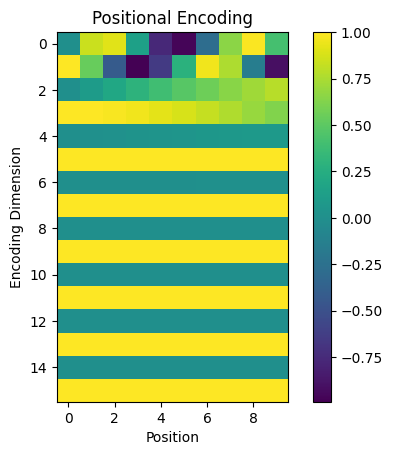

In [45]:
import matplotlib.pyplot as plt

def get_positional_encoding(seq_len, d_model):
    PE = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** ((2 * i)/d_model)))
            if i + 1 < d_model:
                PE[pos, i+1] = np.cos(pos / (10000 ** ((2 * i)/d_model)))
    return PE

PE = get_positional_encoding(10, 16)
plt.imshow(PE.T, cmap="viridis")
plt.title("Positional Encoding")
plt.xlabel("Position")
plt.ylabel("Encoding Dimension")
plt.colorbar()
plt.show()


##  5. Multi-Head Attention
Instead of doing self-attention once, we do it in parallel heads and concatenate the results. This allows the model to learn different types of relationships.

## 6. Transformer Block
Each block contains:

Multi-head self-attention

Add & LayerNorm

Feed Forward (Dense) Layer

Add & LayerNorm

These are stacked multiple times in both encoder and decoder.

##  7. Decoder + Masked Attention
In generation (like GPT), we mask future words so the model can’t cheat.

In [46]:
# Mask = upper triangle matrix
def get_mask(seq_len):
    return np.triu(np.ones((seq_len, seq_len)), k=1)

mask = get_mask(5)
print(mask)


[[0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


##  8. Why Transformers Work So Well
Parallelizable training

Global context for every word

Effective long-range dependency capture

Scales well with data



## 9. Limitations
Expensive for very long inputs

Quadratic time & memory complexity

Still an active research area (e.g., Longformer, FlashAttention)

# DAY 9 (task1) (30.5.25)

## Run preprocessing pipeline on sample corpus

In [47]:
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')


import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Asus/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [48]:
#  Define sample corpus
# Use 2 sample movie reviews for now
sample_docs = []
for fileid in movie_reviews.fileids()[:2]:
    sample_docs.append(movie_reviews.raw(fileid))


In [49]:
# Preprocessing pipeline
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens


In [50]:
preprocessed_docs = []
for doc in sample_docs:
    tokens = preprocess(doc)
    preprocessed_docs.append(tokens)


In [51]:
class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean(self, text):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in self.stop_words]
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        return tokens


## Visualize before vs. after

In [52]:
print("Original:\n", sample_docs[0][:500])
print("\nCleaned Tokens:\n", preprocessed_docs[0][:50])


Original:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt

Cleaned Tokens:
 ['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess']


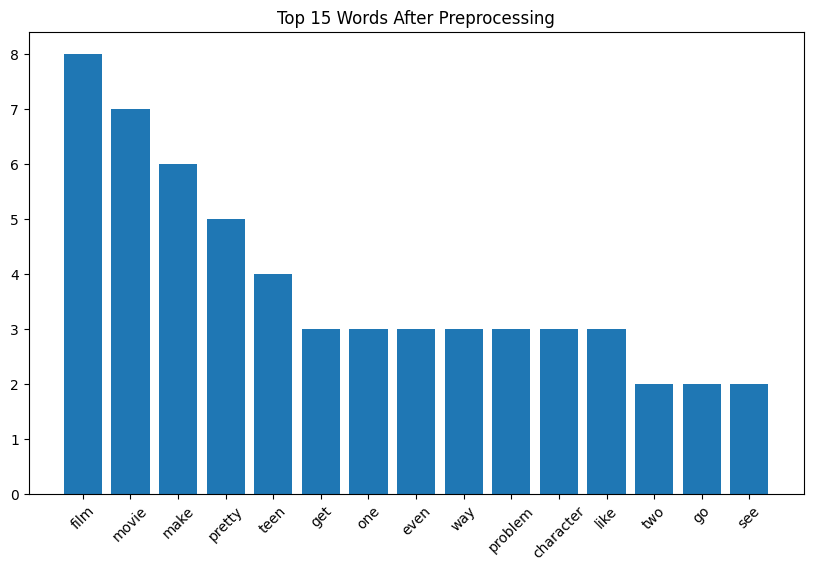

In [53]:
import matplotlib.pyplot as plt
from collections import Counter

word_freq = Counter(preprocessed_docs[0])
most_common = word_freq.most_common(15)
words, freqs = zip(*most_common)

plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.title("Top 15 Words After Preprocessing")
plt.xticks(rotation=45)
plt.show()


# DAY 9 (task2): 

# CS224N Lecture: Pretraining in NLP

---

##  Introduction to Pretraining

Pretraining refers to training a language model on a large, unlabeled corpus to learn general linguistic patterns before fine-tuning it for a specific task (e.g., sentiment analysis, translation).

It enables models to:
- Learn rich, contextual representations of words.
- Generalize better across various NLP tasks.

---

##  The Problem with Fixed Vocabularies

Earlier models like Word2Vec had a fixed vocabulary. Words not in the vocabulary were replaced with an **UNK** (unknown) token, losing valuable semantic information.

### Example



In [54]:
sentence = "unhappiness"
vocab = {"happy", "sad", "joy"}

if sentence not in vocab:
    print("UNK")


UNK


This is problematic because unhappiness clearly carries sentiment and meaning, but gets dropped entirely.

## Subword Modeling
Instead of treating unhappiness as a single word, we break it into subwords like:

un + happy + ness

Subword tokenization (e.g., using BPE or WordPiece) helps model rare or unseen words more effectively.

Example using Hugging Face Tokenizer

In [55]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize("unhappiness")
print(tokens)


['un', '##ha', '##pp', '##iness']


## Contextual Representations
Unlike Word2Vec (static embeddings), contextual models generate different vectors for the same word based on surrounding context.

### Example

In [56]:
from transformers import AutoModel, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

sentence1 = "He went to the bank to deposit money"
sentence2 = "She sat by the river bank"

inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

with torch.no_grad():
    outputs1 = model(**inputs1).last_hidden_state
    outputs2 = model(**inputs2).last_hidden_state

print("Different embeddings for 'bank' depending on context")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Different embeddings for 'bank' depending on context


## Pretraining Objectives
1. Masked Language Modeling (MLM)
Used in BERT. Randomly masks ~15% of tokens, and the model tries to predict them.

### Example

In [57]:
from transformers import pipeline

fill_mask = pipeline("fill-mask", model="bert-base-uncased")
fill_mask("The weather is [MASK] today.")

#Output: [sunny, nice, good, rainy, warm] — based on context.

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.16506372392177582,
  'token': 2204,
  'token_str': 'good',
  'sequence': 'the weather is good today.'},
 {'score': 0.11934636533260345,
  'token': 4010,
  'token_str': 'warm',
  'sequence': 'the weather is warm today.'},
 {'score': 0.060145191848278046,
  'token': 10256,
  'token_str': 'mild',
  'sequence': 'the weather is mild today.'},
 {'score': 0.043130915611982346,
  'token': 2986,
  'token_str': 'fine',
  'sequence': 'the weather is fine today.'},
 {'score': 0.03318683058023453,
  'token': 4658,
  'token_str': 'cool',
  'sequence': 'the weather is cool today.'}]

## Model Architectures
Encoder-Decoder
Used in sequence-to-sequence tasks like translation.

E.g., T5, BART.

Decoder-Only
Used in autoregressive language generation.

E.g., GPT family (GPT-2, GPT-3, GPT-4).

## GPT and Autoregressive Pretraining
GPT uses a decoder-only architecture and trains with causal language modeling:

Predict the next word based on previous words.

No masking; instead, future tokens are hidden during training.

### Example: Text Generation

In [58]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")
generator("The future of AI is", max_length=20, num_return_sequences=1)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP do

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "The future of AI is uncertain, as AI remains a very nascent field. But it has been shown to be able to learn a lot, and to be able to solve a lot of problems, in a very short amount of time. It's an open question of whether or not human-machine interactions will ever solve the problems of AI.\n\nSo, with the technology that we've been able to create, I'm not sure that the future of AI will be that far-fetched. I'm not sure that it will be quite the opposite. There will be lots of problems that AI can solve, and lots of people will be able to solve them. But I'm not sure that AI will be a lot more difficult to solve than computer programs or artificial intelligence. That's the question that I'm not sure is so far-fetched at this point.\n\nThe question is how long will that be, and what can we expect to achieve with the technology that we're working with, and the possibilities for AI that we're working with.\n\nThe current technology has an enormous potential to solv

## Improvements in Pretraining
RoBERTa improved on BERT by removing the Next Sentence Prediction task and training longer on more data.

Lightweight fine-tuning methods (e.g., adapters, LoRA) reduce training costs and memory use.